# Исследовательский анализ вакансий в Москве

![separator1](https://i.imgur.com/ZUWYTii.png)

## Содержание

1. **[Background проекта](#1)**
2. **[Описание данных](#2)**
3. **[Предобработка данных](#3)**
4. **[Распределения переменных](#4)**
5. **[Корреляционный анализ](#5)**
6. **[Распределения заработной платы в зависимости от признаков](#6)**
7. **[Постановка гипотез](#7)**
8. **[Статистическая проверка гипотез](#8)**
9. **[Проверка модели на устойчивость](#9)**
10. **[Выводы](#10)**

![separator1](https://i.imgur.com/ZUWYTii.png)

## 1. Background проекта <a name= '1'></a>

Рынок труда в Москве отличается высокой конкуренцией и значительной дифференциацией заработных плат. Для соискателей важно понимать, какие факторы – опыт работы, отрасль, график занятости, требования работодателя к резюме или географическое расположение – оказывают ключевое влияние на уровень оплаты труда.

**Исследовательский вопрос:** Какие факторы вакансии влияют на уровень предлагаемой заработной платы?

**План работы:** 
1. Загрузка данных
2. Предобработка данных
   - первичный осмотр данных
   - проверка на наличие пропущенных значений
   - вывод описательных статистик
   - проверка на наличие выбросов
4. Распределения переменных
5. Корреляционный анализ
   - матрица Спирмена
   - матрица Кенделла
6. Распределения заработной платы в зависимости от:
   - опыта работы
   - отрасли и опыта работы
   - отрасли
   - требования к наличию полного резюме
   - расстояния работодателя до метро
   - АО Москвы
7. Проверка статистических гипотез:
   - различия в зарплатах по опыту (Краскела–Уоллиса)
   - различия в зарплатах по отраслям (Краскела–Уоллиса)
   - различия в зарплатах по наличию полного резюме (Манна–Уитни)
   - различия в зарплатах по локации (Манна–Уитни)
8. Проверка модели на устойчивость
9. Выводы

![separator1](https://i.imgur.com/ZUWYTii.png)

## 2. Описание данных <a name= '2'></a>

- salary — предлагаемая заработная плата (рубли)

- experience — требуемый опыт работы (нет опыта, 1–3 года, 3–6 лет, более 6 лет)

- employment — тип занятости (полная, частичная, проектная и др.)

- schedule — график работы (полный день, гибкий график, сменный и др.)

- industry — отрасль компании (авто, логистика, электроника и др.)

- AO — административный округ Москвы, где расположена вакансия

- accept_incomplete_resumes — допускается ли неполное резюме (0 — нет, 1 — да)

- professional_roles — профессиональная роль вакансии

- employer_trusted — проверенный работодатель или нет (0 — нет, 1 — да)

- employer_type — тип работодателя (компания, агентство)

- stations_within_km — количество станций метро в радиусе 1 км

- distance_to_the_nearest(m) — расстояние до ближайшей станции метро (в метрах)

![separator1](https://i.imgur.com/ZUWYTii.png)

## 3. Предобработка данных <a name= '3'></a>

#### 3.1 Импорт библиотек

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import shapiro, kstest, anderson, kruskal, mannwhitneyu

from sklearn.preprocessing import LabelEncoder

#### 3.2 Загрузка данных

In [2]:
vacancies_original = pd.read_csv (r'D:\pet_projects\vacancies_analysis\vacancies.csv')
vacancies_original.head()

,premium,has_test,response_letter_required,archived,schedule,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,...,has_email,phones_count,vacancy_type,lat,lon,industry,stations_within_km,distance_to_the_nearest(m),AO,salary
0,False,False,False,True,Полный день,True,Монтажник,False,От 1 года до 3 лет,Полная занятость,...,False,0,Открытая,55.850439,37.669172,"Электроника, приборостроение, бытовая техника,...",0.0,1139.547085,СВАО,100000.0
1,False,False,False,False,Полный день,False,Бухгалтер,False,От 3 до 6 лет,Полная занятость,...,False,0,Открытая,55.758762,37.750218,"Электроника, приборостроение, бытовая техника,...",2.0,109.992781,ВАО,75000.0
2,False,False,False,False,Полный день,False,Технический директор (CTO),False,Более 6 лет,Полная занятость,...,False,0,Открытая,55.743236,37.650630,"Электроника, приборостроение, бытовая техника,...",4.0,193.529616,ЦАО,282750.0
3,False,False,False,False,Полный день,False,Бухгалтер,False,От 3 до 6 лет,Полная занятость,...,False,0,Открытая,55.758762,37.750218,"Электроника, приборостроение, бытовая техника,...",2.0,109.992781,ВАО,75000.0
4,False,False,False,False,Полный день,False,Руководитель отдела продаж,False,От 3 до 6 лет,Полная занятость,...,False,0,Анонимная,NaN,NaN,"Электроника, приборостроение, бытовая техника,...",NaN,NaN,Не в Москве,304500.0


#### 3.3 Первичный осмотр данных

Удалим столбцы, которые не будем использовать в дальнейшем анализе

In [3]:
vacancies = vacancies_original.drop(['premium',
               'response_letter_required',
               'archived',
               'professional_roles',
               'accept_temporary',
               'is_adv_vacancy',
               'industries_count',
               'has_email',
               'vacancies_count',                      
               'phones_count',
               'vacancy_type',
               'lat',
               'lon'], axis=1)
vacancies.tail(3)

,has_test,schedule,accept_incomplete_resumes,experience,employment,employer_trusted,employer_type,industry,stations_within_km,distance_to_the_nearest(m),AO,salary
31123,False,Полный день,False,От 1 года до 3 лет,Полная занятость,True,company,"Перевозки, логистика, склад, ВЭД",1.0,867.808517,ЮАО,120000.0
31124,False,Полный день,False,Нет опыта,Полная занятость,True,company,"Перевозки, логистика, склад, ВЭД",2.0,186.815416,ЮВАО,43587.0
31125,False,Полный день,False,От 1 года до 3 лет,Полная занятость,True,company,"Перевозки, логистика, склад, ВЭД",0.0,2233.778798,Не в Москве,80040.0


In [4]:
print(f'Размер датасета: {vacancies.shape}')

Размер датасета: (31126, 12)


In [5]:
print(f'Типы данных в датасете:\n{vacancies.dtypes}')

Типы данных в датасете:
has_test                         bool
schedule                       object
accept_incomplete_resumes        bool
experience                     object
employment                     object
employer_trusted                 bool
employer_type                  object
industry                       object
stations_within_km            float64
distance_to_the_nearest(m)    float64
AO                             object
salary                        float64
dtype: object


#### 3.4 Проверка датасета на наличие пропущенных значений

In [6]:
print(f'Количество пропущенных значений:\n{vacancies.isna().sum()}')

Количество пропущенных значений:
has_test                         0
schedule                         0
accept_incomplete_resumes        0
experience                       0
employment                       0
employer_trusted                 0
employer_type                   94
industry                         0
stations_within_km            6898
distance_to_the_nearest(m)    6898
AO                               0
salary                           0
dtype: int64


In [7]:
vacancies_cl = vacancies.dropna()
print(f'Количество пропущенных значений:\n{vacancies_cl.isna().sum()}')

Количество пропущенных значений:
has_test                      0
schedule                      0
accept_incomplete_resumes     0
experience                    0
employment                    0
employer_trusted              0
employer_type                 0
industry                      0
stations_within_km            0
distance_to_the_nearest(m)    0
AO                            0
salary                        0
dtype: int64


In [8]:
print(f'Размер очищенного датасета: {vacancies_cl.shape}')

Размер очищенного датасета: (24228, 12)


#### 3.5 Вывод уникальных значений

In [9]:
print(f'Количество уникальных значений в столбцах:\n{vacancies_cl.nunique()}')

Количество уникальных значений в столбцах:
has_test                         2
schedule                         5
accept_incomplete_resumes        2
experience                       4
employment                       4
employer_trusted                 2
employer_type                    4
industry                         3
stations_within_km              13
distance_to_the_nearest(m)    4268
AO                              13
salary                         985
dtype: int64


In [10]:
columns = ['schedule', 'experience', 'employment', 'employer_type', 'industry', 'AO']
for col in columns:
    unique_val = vacancies_cl[col].unique()
    print(f'Уникальные значения в столбце {col}:\n{unique_val}')

Уникальные значения в столбце schedule:
['Полный день' 'Сменный график' 'Удаленная работа' 'Гибкий график'
 'Вахтовый метод']
Уникальные значения в столбце experience:
['От 1 года до 3 лет' 'От 3 до 6 лет' 'Более 6 лет' 'Нет опыта']
Уникальные значения в столбце employment:
['Полная занятость' 'Проектная работа' 'Частичная занятость' 'Стажировка']
Уникальные значения в столбце employer_type:
['company' 'agency' 'project_director' 'private_individual']
Уникальные значения в столбце industry:
['Электроника, приборостроение, бытовая техника, компьютеры и оргтехника'
 'Автомобильный бизнес' 'Перевозки, логистика, склад, ВЭД']
Уникальные значения в столбце AO:
['СВАО' 'ВАО' 'ЦАО' 'ЮЗАО' 'Не в Москве' 'СЗАО' 'САО' 'ЮВАО'
 'Новомосковский' 'ЗАО' 'ЮАО' 'Троицкий' 'ЗелАО']


Заменим длинные значения по столбцу industry на сокращенные, чтобы в ходе дальнейшего анализа они более аккуратно отображались на диаграммах

In [11]:
industry_map = {
    'Автомобильный бизнес': 'Авто',
    'Электроника, приборостроение, бытовая техника, компьютеры и оргтехника': 'Электроника',
    'Перевозки, логистика, склад, ВЭД': 'Логистика'
}
vacancies_cl = vacancies_cl.copy()
vacancies_cl['industry'] = vacancies_cl['industry'].map(industry_map)

#### 3.6 Описательная статистика для количественных переменных

In [12]:
vacancies_cl.describe()

,stations_within_km,distance_to_the_nearest(m),salary
count,24228.000000,24228.000000,2.422800e+04
mean,1.597697,1514.395852,1.089646e+05
std,2.003585,3072.989502,5.235669e+05
min,0.000000,0.000000,4.132500e+01
25%,0.000000,425.633111,6.960000e+04
50%,1.000000,758.662494,9.000000e+04
75%,2.000000,1325.857069,1.300000e+05
max,12.000000,42398.689860,5.742563e+07


**Выводы:**
1. stations_within_km:
- Среднее значение — 1,6 станции, медиана — 1 станция, минимум — 0, максимум — 12.
- 25% вакансий не имеют ни одной станции метро в радиусе километра, 75% — максимум 3 станции.
- Значения распределены неравномерно: большинство вакансий сосредоточено в районах с 0–3 станциями метро поблизости.

2. distance_to_the_nearest(m):
- Среднее расстояние до ближайшей станции — 1514 м, медиана — 759 м.
- Минимальное значение — 0 м (вакансия прямо у метро), максимум — 42 399 м.
- 25% вакансий находятся ближе 426 м к метро, 75% — ближе 1326 м.
- Распределение скошено: у части вакансий метро очень далеко, при этом большинство — в шаговой доступности.

3. salary:
- Средняя зарплата — 108 946 руб., медиана — 90 000 руб., минимум — 41,3 руб., максимум — 57 425 630 руб.
- 25% вакансий предлагают до 69 600 руб., 75% — до 130 000 руб.
- Распределение зарплат имеет выраженную правостороннюю асимметриюю: медиана ниже среднего, присутствуют вакансии с очень высокими зарплатами, которые увеличивают среднее значение

Как видно из дескриптивного анализа, в столбце salary присутствуют аномально низкое и высокое значение заработной платы (41,3 руб. и 57 425 630 руб. соотвесттвенно). Посмотрим на 20 минимальных и максимальных значений в столбце salary 

In [13]:
vacancies_cl['salary'].nsmallest(20)

7601        41.325
4884       110.000
6562       110.000
17691      147.900
3551       160.000
3806       160.000
7683       165.000
3534       165.300
3787       165.300
4956      1650.000
6667      1650.000
4221      2000.000
5405      2000.000
11681     2000.000
11983     2000.000
22360     2000.000
22475     2000.000
29621     5500.000
4320     16000.000
5579     16000.000
Name: salary, dtype: float64

In [14]:
vacancies_cl['salary'].nlargest(20)

27544    57425633.25
29480    57425633.25
3684       600000.00
3939       600000.00
12878      550000.00
13634      550000.00
14791      550000.00
14967      550000.00
15585      550000.00
15944      550000.00
4667       549999.50
6174       549999.50
7318       500000.00
10702      500000.00
11178      500000.00
12699      500000.00
12792      500000.00
12891      500000.00
13377      500000.00
13510      500000.00
Name: salary, dtype: float64

Можно заключить, что в столбце salary присутствуют аномальные значения, а именно:
- 2 наблюдения с аномально большими значениями (вероятно всего - дубликаты): заработная плата равна 57 425 630 руб.
- 18 наблюдений с аномально низкими значениями: заработная плата от 41,3 руб. до 5500 руб.

Удалим эти наблюдения, как аномальные

In [15]:
vacancies_cl = vacancies_cl.drop(vacancies_cl['salary'].nsmallest(18).index)
vacancies_cl = vacancies_cl.drop(vacancies_cl['salary'].nlargest(2).index)

#### 3.7 Описательная статистика для качественных переменных

In [16]:
vacancies_cl.describe(include=['object', 'bool'])

,has_test,schedule,accept_incomplete_resumes,experience,employment,employer_trusted,employer_type,industry,AO
count,24208,24208,24208,24208,24208,24208,24208,24208,24208
unique,2,5,2,4,4,2,4,3,13
top,False,Полный день,False,От 1 года до 3 лет,Полная занятость,True,company,Логистика,Не в Москве
freq,23849,17569,15548,11279,23576,24158,23849,9713,3769


**Выводы:**
1. has_test: в большинстве вакансий (23 849 из 24 208) тестовое задание отсутствует.
2. schedule: наиболее распространённый график — полный день (17 659 вакансий).
3. accept_incomplete_resumes: в большинстве случаев (15 548 вакансии) резюме с неполными данными не принимаются.
4. experience: самая частая категория — от 1 года до 3 лет (11 279 вакансия).
5. employment: преобладает полная занятость (23 576 вакансии).
6. employer_trusted: большинство работодателей отмечены как проверенные (24 158 вакансий).
7. employer_type: преобладает тип "компания" (23 849 вакансий).
8. industry: лидирует отрасль "Перевозки, логистика, склад, ВЭД" (9 713 вакансий).
9. AO: наибольшее число вакансий относится к категории "Не в Москве" (3 769 вакансий)

#### 3.8. Проверка на наличие выбросов

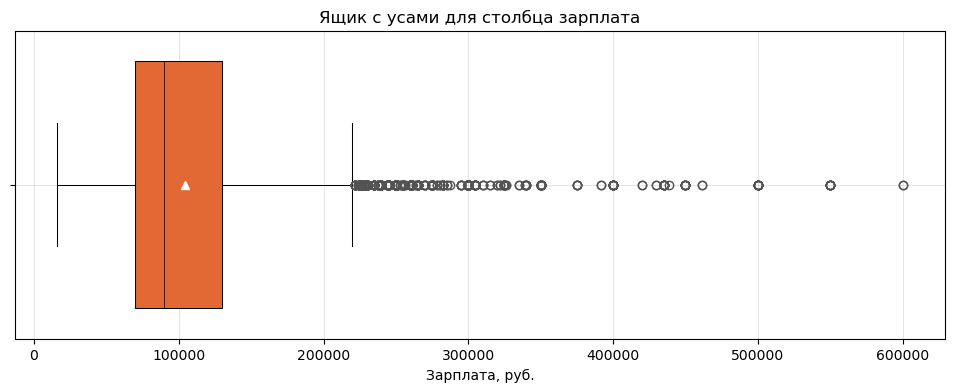

In [17]:
plt.figure(figsize = (12,4))
sns.boxplot(x = vacancies_cl['salary'],
            showmeans = True,
            orient = 'horizontal', 
            color = '#FF5E16',
            linewidth = .75,
           meanprops={
        "markerfacecolor": "white",   # заливка маркера
        "markeredgecolor": "white",   # обводка маркера
        "markersize": 6               # размер маркера
        },
    boxprops=dict(edgecolor='black'),         # граница ящика
    whiskerprops=dict(color='black'),         # усы
    capprops=dict(color='black'),             # концы усов
    medianprops=dict(color='black', linewidth=0.5), # медиана
)
plt.title('Ящик с усами для столбца зарплата', fontsize = 12)
plt.xlabel('Зарплата, руб.', fontsize=10)
plt.grid(True,  which = 'major', linewidth = 0.5, color = 'gray', alpha = 0.3)

Исходя из построенной диаграммы заключим, что в датасете по столбцу salary присутствуют выбросы в большую стороны (вакансии с большим уровнем заработной платы). Во избежание искажаения результатов дальнейшего анализа - удалим выбросы. Выбросы определяются как значения, находящиеся за пределами усов, которые представляют 1,5 межквартильного размаха (IQR).

In [18]:
vacancies_without_outliers = []
    # подсчитываем межквартильный размах
q25 = np.percentile(vacancies_cl['salary'], 25)
q75 = np.percentile(vacancies_cl['salary'], 75)
iqr = q75 - q25
    # подсчитываем нижнюю и верхнюю границы
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [19]:
# удаляем выбросы
vacancies_without_outliers = vacancies_cl.loc[(vacancies_cl['salary'] <= upper) & (vacancies_cl['salary'] >= lower)].reset_index(drop=True)
print(f'Размер датасета без выбросов: {vacancies_without_outliers.shape}')

Размер датасета без выбросов: (23451, 12)


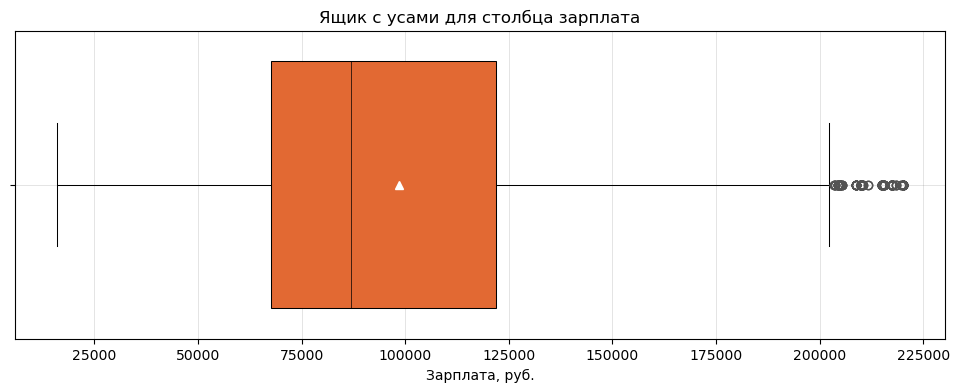

In [20]:
plt.figure(figsize = (12,4))
sns.boxplot(x = vacancies_without_outliers['salary'],
            showmeans = True,
            orient = 'horizontal', 
            color = '#FF5E16',
            linewidth = .75,
           meanprops={
        "markerfacecolor": "white",   # заливка маркера
        "markeredgecolor": "white",   # обводка маркера
        "markersize": 6               # размер маркера
    },
    boxprops=dict(edgecolor='black'),         # граница ящика
    whiskerprops=dict(color='black'),         # усы
    capprops=dict(color='black'),             # концы усов
    medianprops=dict(color='black', linewidth=0.5), # медиана
)
plt.title('Ящик с усами для столбца зарплата', fontsize = 12)
plt.xlabel('Зарплата, руб.', fontsize=10)
plt.grid(True,  which = 'major', linewidth = 0.5, color = 'gray', alpha = 0.3)

**Выводы:**
1. Медиана зарплат смещена ближе к нижней границе ящика, что указывает на асимметрию распределения: большая часть зарплат сосредоточена ближе к нижнему квартилю, а верхний квартиль более растянут.

2. Среднее значение расположено правее медианы, что подтверждает наличие правосторонней (положительной) асимметрии: в данных присутствуют относительно высокие зарплаты, которые увеличивают среднее значение.

3. Интерквартильный размах (ширина ящика) показывает, что 50% вакансий имеют зарплаты в диапазоне примерно от 70 000 до 120 000 рублей.

4. 75% вакансий предлагают заработную плату менее 120 000 рублей
5. 50% вакансий предлагают заработную плату менее 85 000 рублей
6. 25% вакансий предлагают заработную плату менее 70 000 рублей
7. Средний уровень предлагаемой заработной платы равен приблизительно 100 000 рублей

Более точные значения квартилей и среднего после удаления выбросов по столбцу заработная плата можно посмотреть опять же через описательную статистику

In [21]:
vacancies_without_outliers.describe()

,stations_within_km,distance_to_the_nearest(m),salary
count,23451.000000,23451.000000,23451.000000
mean,1.605731,1516.334389,98594.990677
std,2.012547,3092.794000,42462.843327
min,0.000000,0.000000,16000.000000
25%,0.000000,425.633111,67500.000000
50%,1.000000,757.793371,87000.000000
75%,2.000000,1322.285990,121800.000000
max,12.000000,42398.689860,220000.000000


In [22]:
vacancies_without_outliers.describe(include=['object', 'bool'])

,has_test,schedule,accept_incomplete_resumes,experience,employment,employer_trusted,employer_type,industry,AO
count,23451,23451,23451,23451,23451,23451,23451,23451,23451
unique,2,5,2,4,4,2,4,3,13
top,False,Полный день,False,От 1 года до 3 лет,Полная занятость,True,company,Логистика,Не в Москве
freq,23097,16930,14895,10983,22835,23405,23098,9534,3640


![separator1](https://i.imgur.com/ZUWYTii.png)

## 4. Распределения переменных <a name= '4'></a>

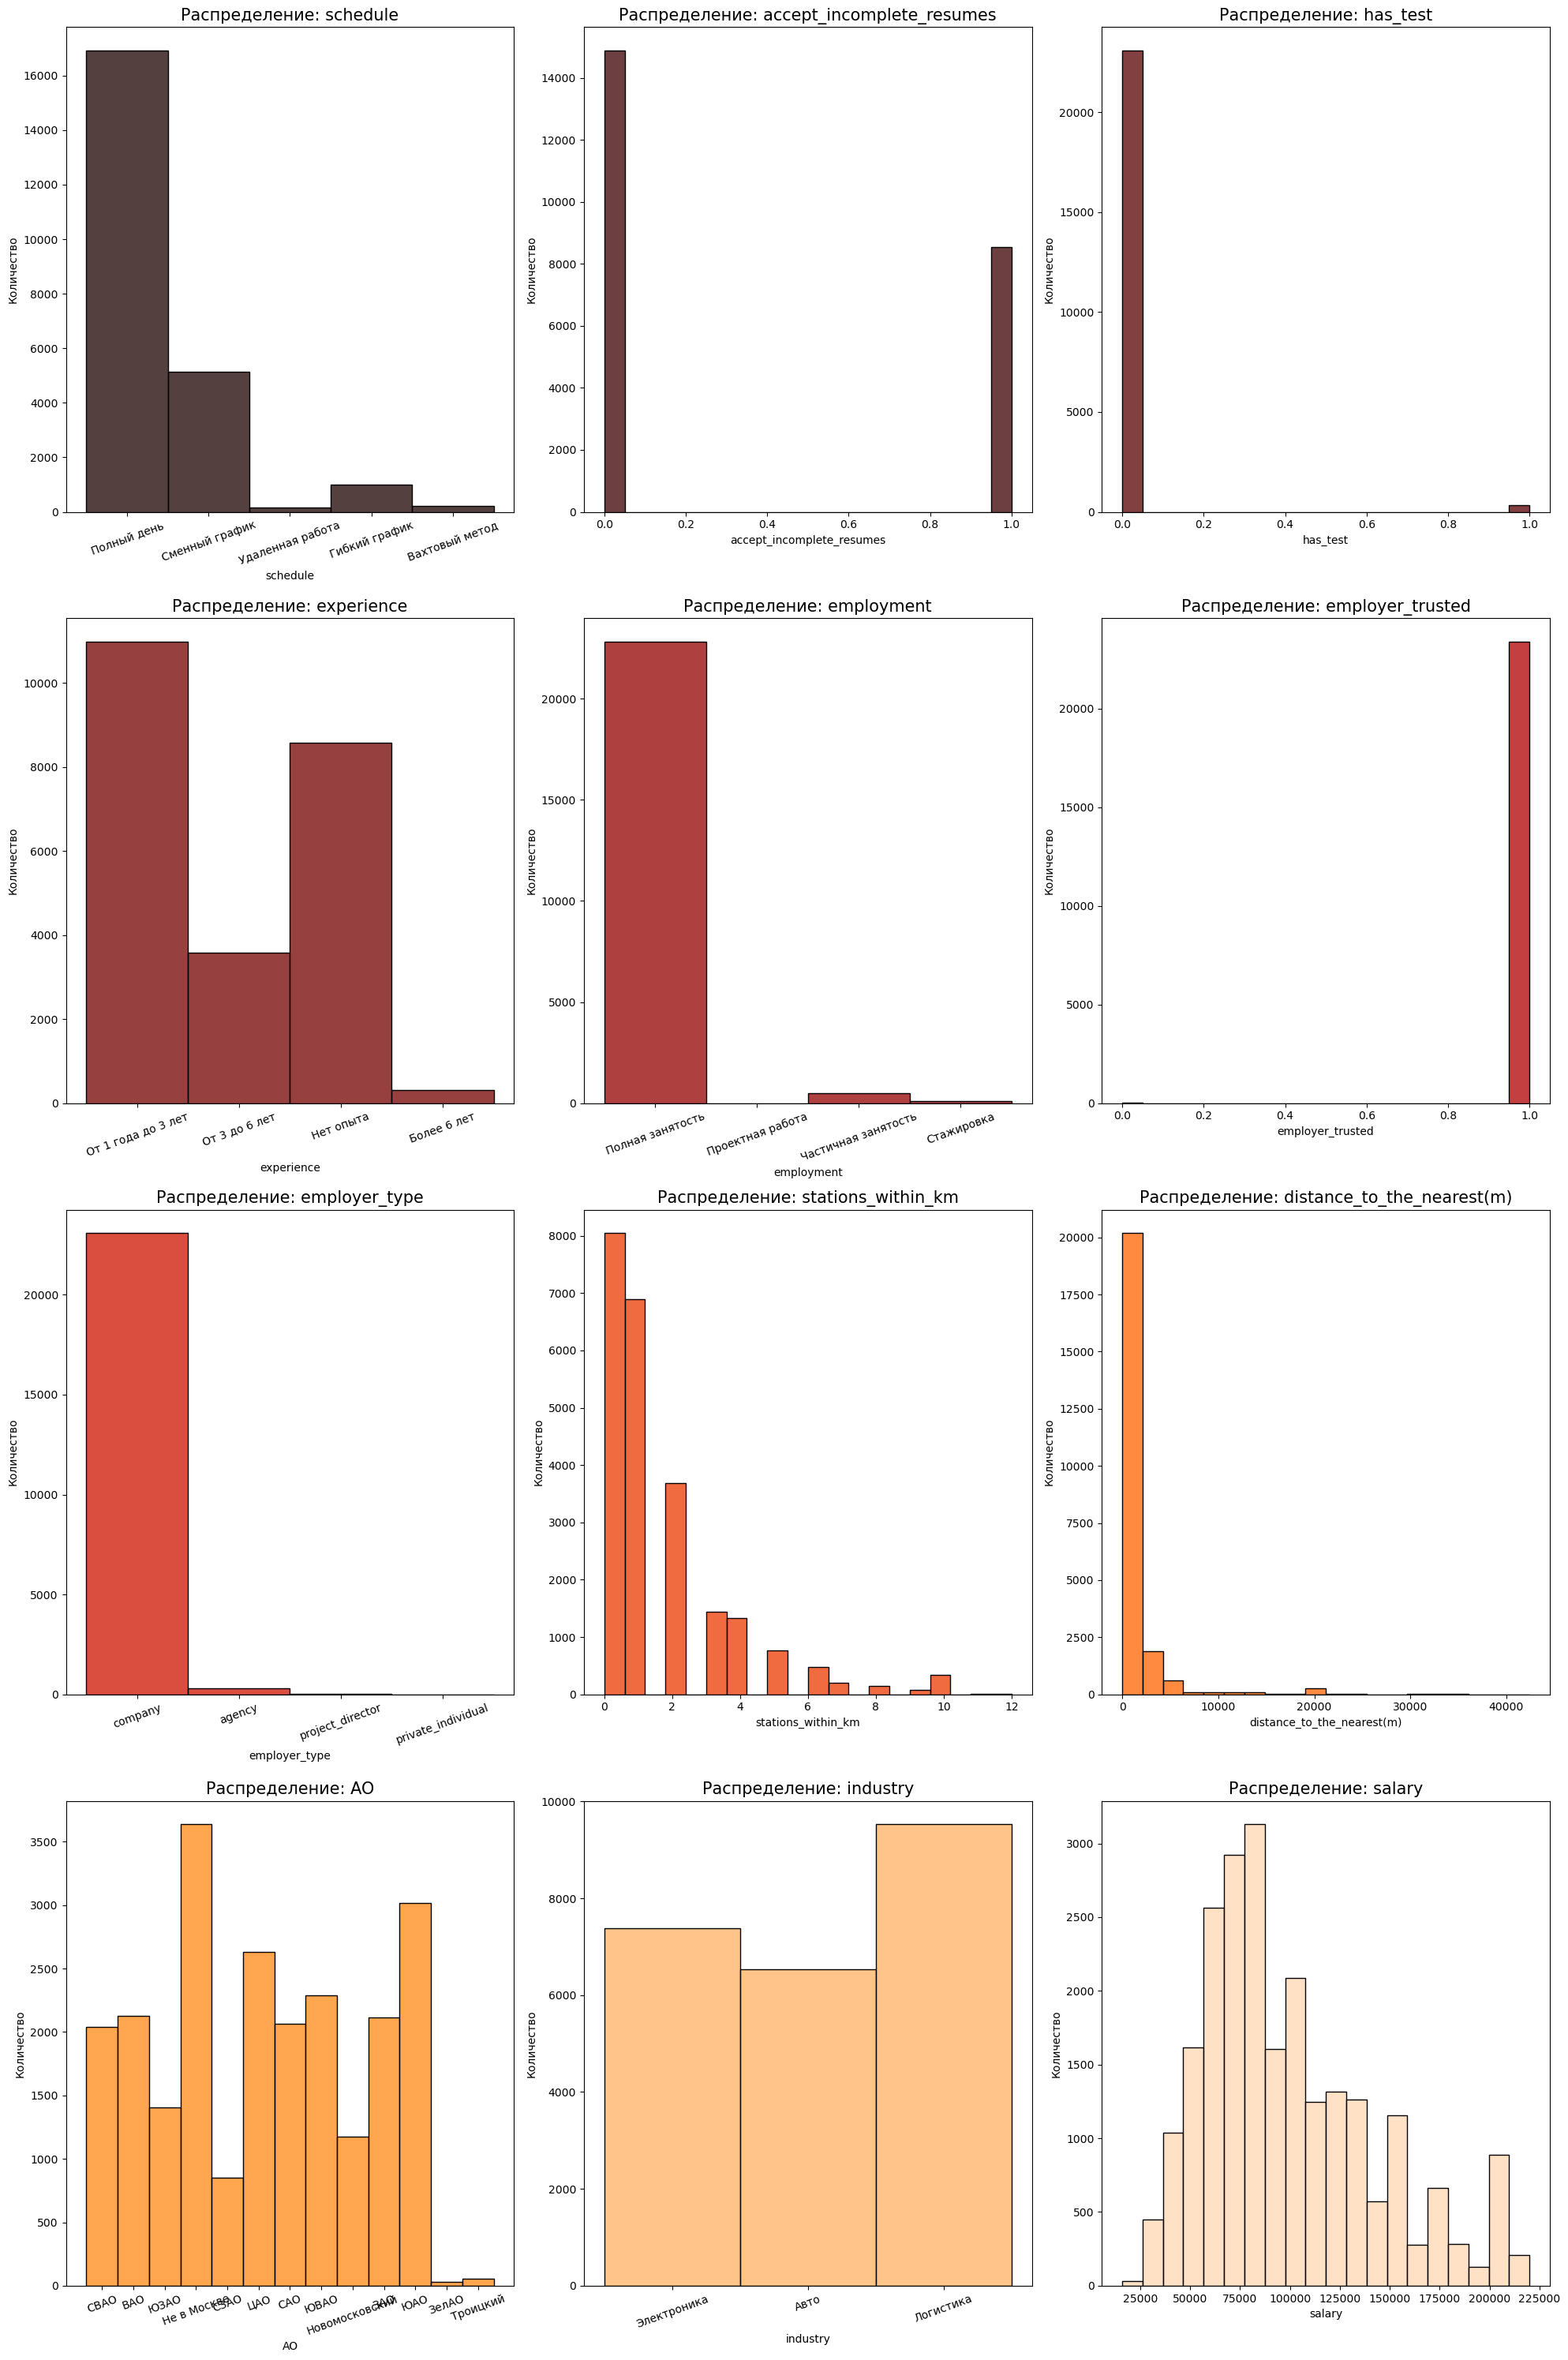

In [23]:
columns = [
    'schedule', 'accept_incomplete_resumes', 'has_test', 'experience', 'employment', 'employer_trusted', 'employer_type', 'stations_within_km', 'distance_to_the_nearest(m)', 'AO', 'industry', 'salary'
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 30))
axes = axes.flatten() #преобразовываем массив axes из 2D (размерность [3, 3]) в 1D (размер [9]), чтобы было удобнее итерироваться. Теперь первый график не [0, 0], а [0], последний график - [8]

for i, col in enumerate(columns):
    ax = axes[i]
    color = sns.color_palette('gist_heat', len(columns))[i]

    sns.histplot(data=vacancies_without_outliers, x=col, bins=20, ax=ax, color=color, edgecolor='black')
    ax.set_title(f"Распределение: {col}", fontsize=15)
    ax.set_ylabel("Количество", fontsize=10)
    ax.set_xlabel(col, fontsize=10)

    # Поворот подписей на оси X, если категорий много
    if vacancies_cl[col].dtype == "object" or col in ['AO', 'schedule', 'experience', 'employment', 'employer_type']:
        ax.tick_params(axis='x', labelrotation=20)

# Удаляем лишние пустые оси, если они остались
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Выводы:**
1. schedule: преобладающее количество вакансий предполагает работу с полным рабочим днём. Альтернативные форматы (вахтовый, сменный, удалённый, гибкий график) представлены существенно реже.

2. accept_incomplete_resumes: большинство работодателей не принимают неполные резюме, что может свидетельствовать о высоких формальных требованиях к кандидатам.

3. has_test: вакансии с тестовым заданием встречаются редко, что ограничивает возможности для сравнения и статистического анализа по этому признаку.

4. experience: наиболее востребованы кандидаты с опытом от 1 до 6 лет. Вакансии для соискателей без опыта или с опытом более 6 лет представлены в меньших объёмах.

5. employment: почти все вакансии предполагают полную занятость. Другие формы занятости (проектная, частичная, стажировка) встречаются редко.

6. employer_trusted: абсолютное большинство вакансий размещены доверенными работодателями, что может ограничивать дисперсию выборки по этому признаку.

7. employer_type: преобладающее число вакансий размещено от имени компаний. Представительство других типов работодателей (агентства, ИП и др.) незначительно.

8. stations_within_km: распределение признака скошено в сторону малых значений. Чаще всего рядом находится одна или две станции метро.

9. distance_to_the_nearest(m): большинство вакансий расположены на расстоянии до 500 метров от станции метро. Наблюдается правосторонняя асимметрия распределения с рядом экстремальных значений, вероятно, отражающих отдалённые районы города.

10. AO: наиболее активно представлены вакансии не в Москве, а также в ЮАО, ЮВАО, ЦАО, что может говорить о концентрации бизнеса или складов/промзон в этих районах.

11. industry: в датасете представлены вакансии по трем отраслям, а именно: "Перевозки, логистика, склад, ВЭД", "Электроника, бытовая техника, компьютеры и оргтехника" и "Автомобильный бизнес". Большинство вакансий относится к отрасли "Перевозки, логистика, склад, ВЭД", меньшая часть приходится на "Автомобильный бизнес".

12. Распределение salary: большинство предложений заработной платы сосредоточено в диапазоне 60 000 – 100 000 руб. Наблюдается значительная правосторонняя асимметрия с «длинным хвостом» вправо — это говорит о наличии отдельных высокооплачиваемых вакансий. На первый взгляд, распределение заработной платы не является нормальным.

**Важное примечание:**

Как видно из распределений, некоторые признаки (has_test, employment, employer_trusted, employer_type) имеют сильный дисбаланс классов, поэтому в ходе дальнейшего анализа эти признаки не стоит рассматривать.

Чем опасен  дисбаланс классов?
- выборка не репрезентативна
- медиана или среднее может не отражать реальное значение
- высокие/низкие значения просто из-за выбросов
- группы сложно интерпретировать (например, сравнивать выборку класса 0 (20 000 наблюдений) и класса 1 (20 наблюдений) - неккоректно)

Отдельно дополнительно проанализируем распределение заработной платы с помощью тестов на нормальность распределения, так как предлагаемая заработная плата будет являтся объясняемой переменной в ходе дальнейшего анализа и проверки гипотез

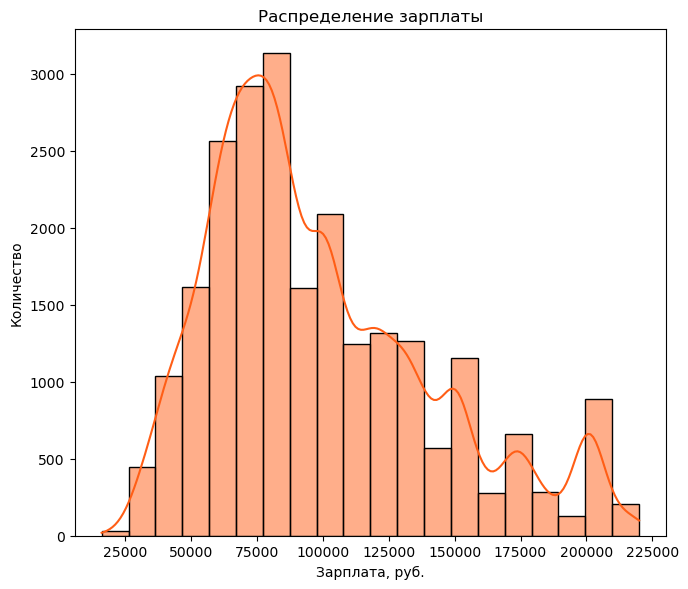

In [24]:
plt.figure(figsize=(7, 6))
sns.histplot(vacancies_without_outliers['salary'], kde=True, bins=20, color='#FF5E16')
plt.title(f'Распределение зарплаты', fontsize = 12)
plt.xlabel('Зарплата, руб.', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.tight_layout()

plt.show()

Для проверки распределения на нормальнось используем тесты: Колмогорова-Смирнова и Андерсона-Дарлинга

Тест Колмогорова–Смирнова применяется для проверки, насколько эмпирическое распределение данных соответствует нормальному распределению

Как рассчитывается?
1. Строится эмпирическая функция распределения (ЭФР) по данным.
2. Вычисляется максимальное абсолютное отклонение между ЭФР и теоретической функцией распределения (формулу см.ниже)
3. Полученное значение сравнивается с критическим значением для заданного уровня значимости. Если статистика превышает критическое значение, нулевая гипотеза отвергается.

Как интерпретировать?
- p-значение > α: Недостаточно доказательств для отклонения нормальности (не доказано, что распределение ненормально)
- p-значение < α: Есть статистически значимые доказательства отклонения от нормальности

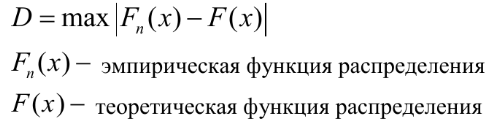

Тест Андерсона–Дарлинга также предназначен для проверки соответствия эмпирического распределения теоретическому, но он более чувствителен к различиям в хвостах распределения. 

Тест Андерсона-Дарлинга:
- Придает больше веса хвостам распределения
- Более чувствителен к выбросам и аномальным значениям
- Лучше обнаруживает отклонения в хвостах распределения
  
Как рассчитывается?
1. Основан на интегральной мере расхождения между эмпирической и теоретической функциями распределения, но с дополнительным весом, усиливающим вклад хвостов.
2. Статистика Андерсона–Дарлинга вычисляется по формуле (см.ниже)
3. Полученное значение сравнивается с табличными критическими значениями для конкретного распределения и уровня значимости.

Как интерпретировать?
- наблюдаемое значение > критического: Есть статистически значимые доказательства отклонения от нормальности
- наблюдаемое значение < критического: Недостаточно доказательств для отклонения нормальности

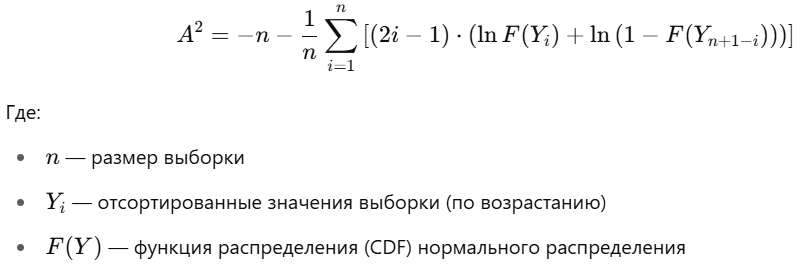

In [25]:
# Kolmogorov–Smirnov
ks_stat, ks_p = kstest(vacancies_without_outliers['salary'], 'norm', args=(vacancies_without_outliers['salary'].mean(), vacancies_without_outliers['salary'].std()))
print(f'Тест Колмогорова-Смирнова: stat={ks_stat:.4f}, p-value={ks_p:.4f}')

Тест Колмогорова-Смирнова: stat=0.1173, p-value=0.0000


In [26]:
# Anderson–Darling
anderson_result = anderson(vacancies_without_outliers['salary'], dist='norm')
print(f'Тест Андерсона-Дарлинга: stat={anderson_result.statistic:.4f}')
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'{sl}%: крит. значение = {cv:.4f}')

Тест Андерсона-Дарлинга: stat=459.4653
15.0%: крит. значение = 0.5760
10.0%: крит. значение = 0.6560
5.0%: крит. значение = 0.7870
2.5%: крит. значение = 0.9180
1.0%: крит. значение = 1.0920


**Вывод:**

Распределение переменной salary имеет ненормальное распределение (выраженную правостороннюю асимметрию). Тесты Колмогорова-Смирнова и Андерсона-Дарлинга показали, что нулевая гипотеза о нормальности распределения отвергается ( в случае с тестом Колмогорова-Смирнова p-value < 0.05, а в случае с тестом Андерсона-Дарлинга наблюдаемое значение > критического значения).

Следовательно:
1. Переменная salary не является нормально распределённой.
2. При проверке гипотез мы будем использовать методы, использующиеся при работе с ненормальным распределением.

![separator1](https://i.imgur.com/ZUWYTii.png)

## 5. Корреляционный анализ <a name= '5'></a>

Для анализа взаимосвязей признаков без ограничений нормального распределения используем метод Спирмена и для наглядности построим тепловую карту корреляций.

Метод ранговой корреляции Спирмена призван установить, как элементы связаны между собой, а также позволяет уточнить их «направление взаимодействия». Если один изучаемый параметр увеличивается (например, х), а вместе с ним растет и второй (например, у), то такая корреляция является положительной. Если при увеличении одного критерия происходит уменьшение второго, то такая корреляция является отрицательной.

Почему используем метод Спирмена?\
Метод Спирмена основан на оценке взаимосвязи между рангами признаков, а не их абсолютными значениями. Это определяет ключевые преимущества данного метода:
- Нет требований к нормальности распределения данных (в нашем случае - заработная плата распределена не нормально)
- Устойчивость к выбросам и нестандартным значениям
- Универсальность - подходит, как для количественных, так и для порядковых переменных
- Выявление, как линейных, так и нелинейных монотонных зависимостей

Как производится рассчет?
1. Ранжирование значений: Для каждой переменной отдельно присваиваем ранги от наименьшего (ранг 1) к наибольшему значению.
2. Обработка связанных рангов: Если встречаются одинаковые значения, присваиваем им средний ранг.
3. Вычисление разностей рангов: Для каждой пары наблюдений вычисляем d = Ранг(X) – Ранг(Y).
4. Возведение разностей в квадрат: Вычисляем d² для каждой пары.
5. Суммирование квадратов разностей: Находим Σd².
6. Формула рассчета выглядит следующим образом:

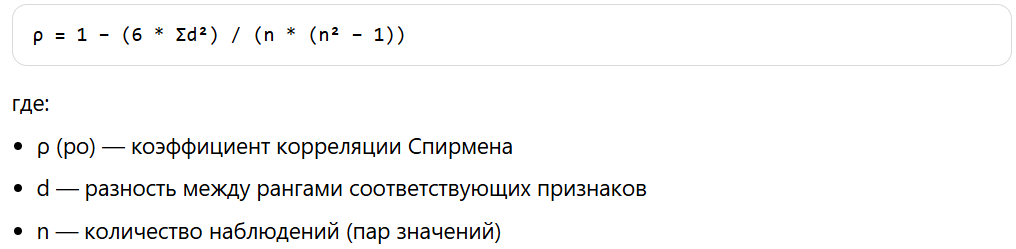

#### 5.1 Корреляционная матрица Спирмена

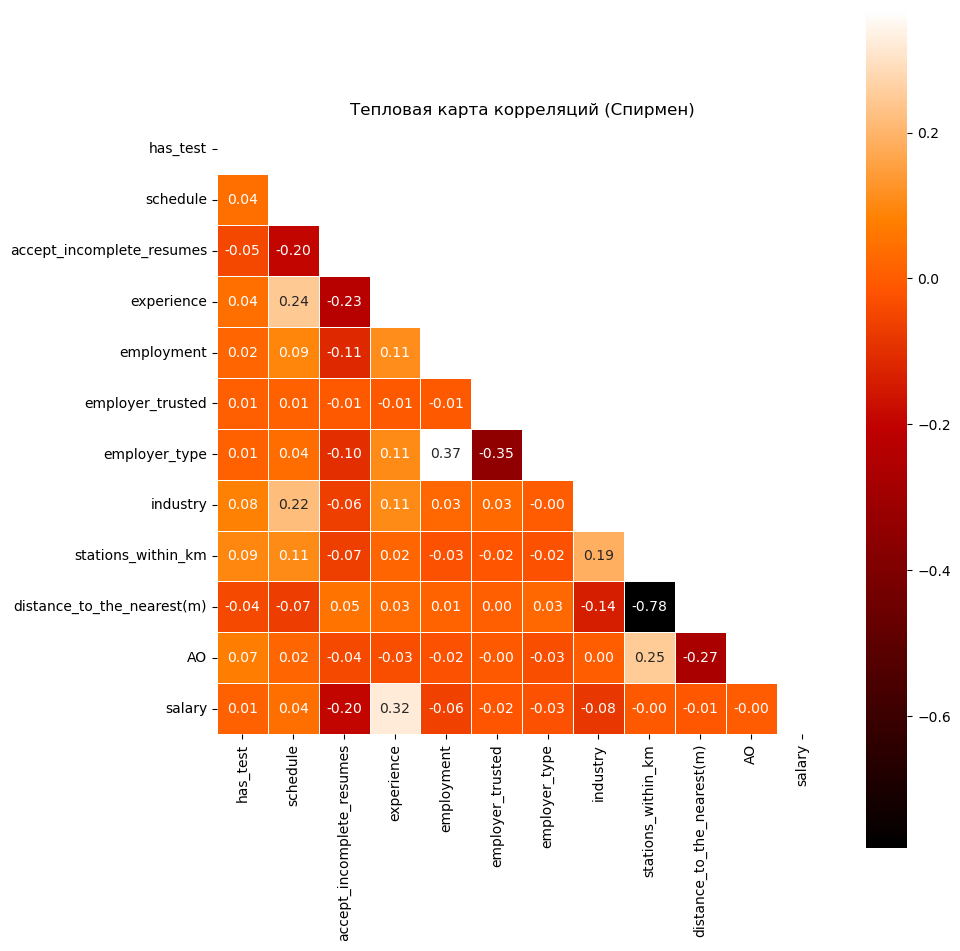

In [27]:
# Копируем датафрейм
df_corr = vacancies_without_outliers.copy()

# 1. Кодируем бинарные флаги
binary_cols = ['has_test', 'employer_trusted', 'accept_incomplete_resumes']
df_corr[binary_cols] = df_corr[binary_cols].astype(int)

# 2. Кодируем порядковые признаки
experience_order = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 1,
    'От 3 до 6 лет': 2,
    'Более 6 лет': 3
}

employment_order = {
    'Стажировка': 0,
    'Частичная занятость': 1,
    'Проектная занятость': 2,
    'Полная занятость': 3
}

schedule_order = {
    'Сменный график': 0,
    'Гибкий график': 1,
    'Удаленная работа': 2,
    'Вахтовый метод': 3,
    'Полный день': 4
}

# 3. Преобразуем категориальные признаки в числовой формат
df_corr['experience'] = df_corr['experience'].map(experience_order)
df_corr['employment'] = df_corr['employment'].map(employment_order)
df_corr['schedule'] = df_corr['schedule'].map(schedule_order)

# 4. Кодируем номинальные переменные
nominal_cols = ['employer_type', 'industry', 'AO']
label_enc = LabelEncoder()
for col in nominal_cols:
    df_corr[col] = label_enc.fit_transform(df_corr[col].astype(str))

# 4. Рассчитываем корреляционную матрицу Спирмена
corr_matrix = df_corr.corr(method='spearman')
# Создаём маску для отображения только нижнего левого угла матрицы
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 5. Визуализируем
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask = mask, annot=True, fmt=".2f", cmap='gist_heat', square=True,linewidths=0.5)
plt.title('Тепловая карта корреляций (Спирмен)', fontsize=12)
plt.tight_layout()

plt.show()

#### 5.2 Корреляционная матрица Кендалла

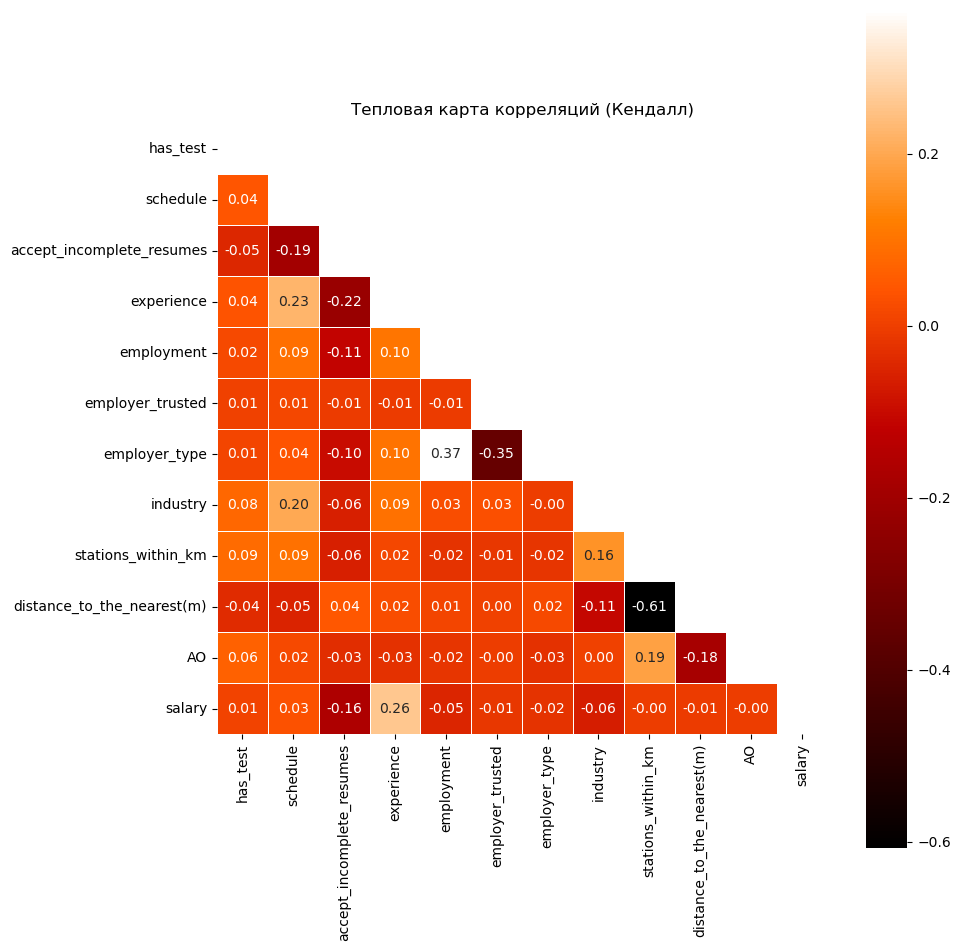

In [28]:
# Копируем датафрейм
df_corr = vacancies_without_outliers.copy()

# 1. Кодируем бинарные флаги
binary_cols = ['has_test', 'employer_trusted', 'accept_incomplete_resumes']
df_corr[binary_cols] = df_corr[binary_cols].astype(int)

# 2. Кодируем порядковые признаки
experience_order = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 1,
    'От 3 до 6 лет': 2,
    'Более 6 лет': 3
}

employment_order = {
    'Стажировка': 0,
    'Частичная занятость': 1,
    'Проектная занятость': 2,
    'Полная занятость': 3
}

schedule_order = {
    'Сменный график': 0,
    'Гибкий график': 1,
    'Удаленная работа': 2,
    'Вахтовый метод': 3,
    'Полный день': 4
}

# 3. Преобразуем категориальные признаки в числовой формат
df_corr['experience'] = df_corr['experience'].map(experience_order)
df_corr['employment'] = df_corr['employment'].map(employment_order)
df_corr['schedule'] = df_corr['schedule'].map(schedule_order)

# 4. Кодируем номинальные переменные
nominal_cols = ['employer_type', 'industry', 'AO']
label_enc = LabelEncoder()
for col in nominal_cols:
    df_corr[col] = label_enc.fit_transform(df_corr[col].astype(str))

# 4. Рассчитываем корреляционную матрицу Спирмена
corr_matrix = df_corr.corr(method='kendall')
# Создаём маску для отображения только нижнего левого угла матрицы
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 5. Визуализируем
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask = mask, annot=True, fmt=".2f", cmap='gist_heat', square=True,linewidths=0.5)
plt.title('Тепловая карта корреляций (Кендалл)', fontsize=12)
plt.tight_layout()

plt.show()

**Выводы:**
1. Наблюдается тесная связь между количеством станций метро в радиусе километра и расстоянием до ближайшей станции метро (−0.78).
Это ожидаемо: чем больше станций метро поблизости, тем меньше среднее расстояние до ближайшей из них.

2. Наблюдается умеренная связь между опытом (experience) и зарплатой (salary) (0.32)
Более высокий требуемый опыт работы связан с более высокими зарплатами.
Это отражает рыночную логику: опытные специалисты получают больше.

3. Наблюдается умеренная связь между типом работодателя (employer_type) и наличием статуса "проверенный" (employer_trusted) (0.37)
Компании определённого типа чаще оказываются проверенными работодателями.

4. Наблюдается слабая связь между количеством станций метро и отраслью (industry) (0.19)
Некоторые отрасли чаще представлены в районах с развитой транспортной инфраструктурой.

5. Наблюдается слабая связь между административным округом (AO) и расстоянием до метро (−0.27)
В некоторых округах вакансии находятся ближе к метро, чем в других.

6. Наблюдается слабая связь между профессиональной ролью (professional_roles) и отраслью (industry) (0.22)
Некоторые профессиональные роли чаще встречаются в определённых отраслях, что вполне закономерно

Остальные коэффициенты корреляции с зарплатой довольно низкие по модулю (< 0.2). Это говорит о том, что большинство представленных признаков, вероятно, слабо связано с уровнем зарплаты.

**Общие выводы:**
- Взаимосвязи между переменными в основном слабые.
- Использование метода Спирмена позволило корректно выявить связи между переменными, несмотря на ненормальность распределений и наличие категориальных признаков.
- В ходе дальнейшего анализа и проверки гипотез, имеет смысл сфокусироваться на зависимостях заработной платы от опыта, требования к резюме, отрасли и, возможно, локации.

![separator1](https://i.imgur.com/ZUWYTii.png)

## 6. Распределения заработной платы в зависимости от признаков <a name= '6'></a>

#### 6.1 Распределение заработной платы в зависимости от опыта работы

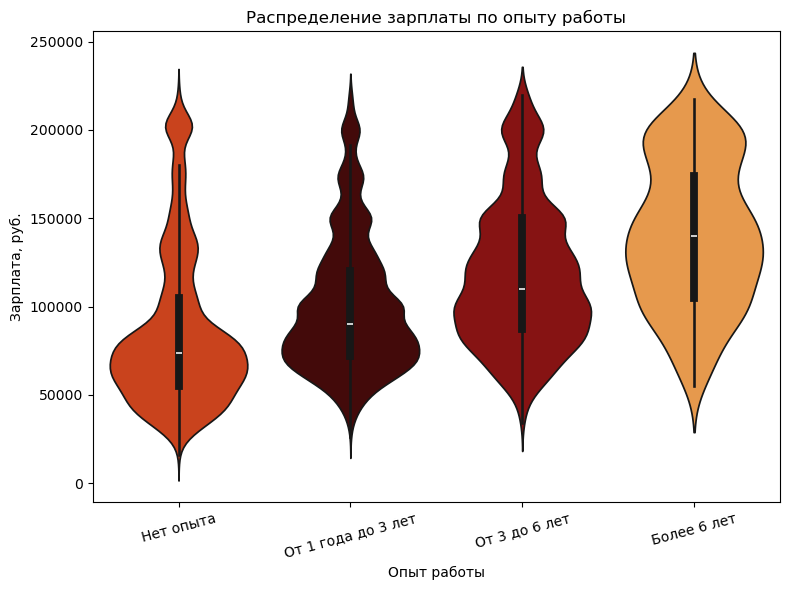

In [29]:
experience_order = [
    'Нет опыта',
    'От 1 года до 3 лет',
    'От 3 до 6 лет',
    'Более 6 лет'
]

plt.figure(figsize=(8, 6))
sns.violinplot(
    x='experience',
    y='salary',
    hue='experience',
    data=vacancies_without_outliers,
    order=experience_order,
    palette='gist_heat',
)

plt.title('Распределение зарплаты по опыту работы',  fontsize=12)
plt.xlabel('Опыт работы', fontsize=10)
plt.ylabel('Зарплата, руб.', fontsize=10)
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

Для визуализации использовался тип диаграммы - Violin Plot (скрипичная диаграмма), представляющая собой гибридный инструмент визуализации, сочетающий в себе элементы box plot (ящик с усами) и kernel density plot (график плотности вероятности).

Основная ценность Violin Plot заключается в способности одновременно отображать:
- Полное распределение данных (через кривые плотности вероятности)
- Медиану и квартили (через внутренние элементы "ящика")
- Минимумы и максимумы (через "усы")
- Выбросы (через отдельные точки)
- Сравнительную плотность вероятности на разных участках распределения (через ширину "скрипки")

**Выводы:**
1. Рост зарплаты с увеличением опыта. Из диаграмм можно заключить, что медиана и основной диапазон зарплат увеличиваются по мере роста требуемого опыта работы. Самые высокие зарплаты характерны для вакансий с требованием "более 6 лет" опыта, а самые низкие — для вакансий "без опыта".

2. Форма распределения. Для каждой категории видны характерные "утолщения" — это области, где сосредоточено наибольшее количество вакансий по уровню зарплаты. Концентрация вакансий по каждой категории приходится на следующие диапазоны:
- нет опыта - от 40 000 до 70 000 рублей.
- от 1 года до 3 лет - от 60 000 до 100 000 рублей.
- от 3 до 6 лет - от 90 000 до 150 000 рублей.
- более 6 лет - от 130 000 до 250 000 рублей.

3. Выбросы и хвосты. Для всех категорий характерны "хвосты" вверх, говорящие о наличии отдельных вакансий с очень высокими зарплатами.

#### 6.2 Распределение заработной платы в зависимости от отрасли и опыта работы

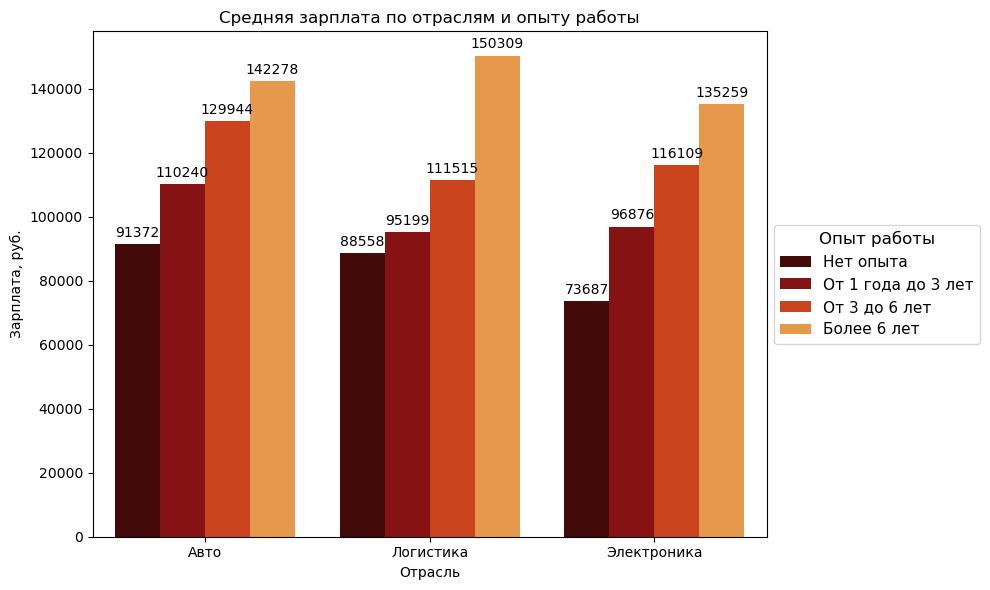

In [30]:
experience_order = [
    'Нет опыта',
    'От 1 года до 3 лет',
    'От 3 до 6 лет',
    'Более 6 лет'
]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='industry',
    y='salary',
    data=vacancies_without_outliers,
    estimator='mean',
    hue='experience',
    order=sorted(vacancies_without_outliers['industry'].unique()),
    hue_order=experience_order,
    palette='gist_heat',
    errorbar=None #отключаем усы
)
# Добавление подписей значений на каждый столбец
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

# Перемещение легенды вправо, вне области графика
ax.legend(
    title='Опыт работы',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=11,
    title_fontsize=12
)


plt.title('Средняя зарплата по отраслям и опыту работы', fontsize=12)
plt.ylabel('Зарплата, руб.', fontsize=10)
plt.xlabel('Отрасль', fontsize=10)

plt.tight_layout()
plt.show()

**Выводы:**
1. Общая тенденция: во всех представленных отраслях средняя зарплата закономерно растёт с увеличением требуемого опыта работы.

2. Сравнение отраслей: самые высокие средние зарплаты для специалистов с опытом "Более 6 лет" наблюдаются в отрасли "Перевозки, логистика, склад, ВЭД" (около 150 000 руб.). В отраслях "Автомобильный бизнес" и "Электроника, бытовая техника, компьютеры и оргтехника" средние зарплаты для этой категории также высоки (приблизительно 142 000 руб. и 135 000 руб.).

#### 6.3 Распределение заработной платы в зависимости от отрасли

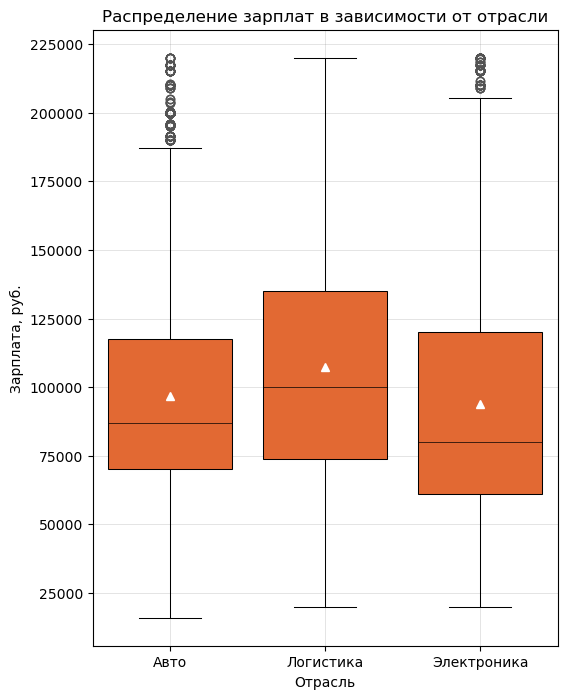

In [31]:
plt.figure(figsize = (6,8))
sns.boxplot(y = vacancies_without_outliers['salary'],
            x = vacancies_without_outliers['industry'],
            showmeans = True,
            color = '#FF5E16',
            linewidth = .75,
           meanprops={
        "markerfacecolor": "white",   # заливка маркера
        "markeredgecolor": "white",   # обводка маркера
        "markersize": 6               # размер маркера
    },
    boxprops=dict(edgecolor='black'),         # граница ящика
    whiskerprops=dict(color='black'),         # усы
    capprops=dict(color='black'),             # концы усов
    medianprops=dict(color='black', linewidth=0.5), # медиана
)

plt.title('Распределение зарплат в зависимости от отрасли', fontsize=12)
plt.xticks([0, 1, 2], ['Авто', 'Логистика', 'Электроника'], fontsize=10)
plt.xlabel('Отрасль', fontsize=10)
plt.ylabel('Зарплата, руб.', fontsize=10)
plt.grid(True,  which = 'major', linewidth = 0.5, color = 'gray', alpha = 0.3)

plt.show()

**Выводы:**
1. Медианное значение заработной платы отличается в зависимости от отрасли.
2. Самая высокая медианная зарплаты наблюдаются в отрасли "Перевозки, логистика, склад, ВЭД" (100 000 руб.). В отраслях "Автомобильный бизнес" и "Электроника, бытовая техника, компьютеры и оргтехника" медианные зарплаты равны приблизительно 85 000 руб. и 80 000 руб. соответственно.

#### 6.4 Распределение заработной платы в зависимости от требования к наличию полного резюме

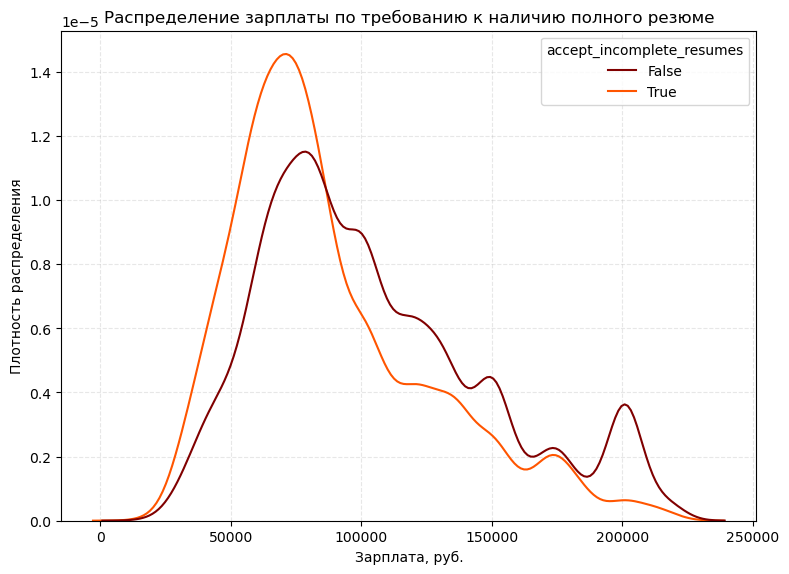

In [32]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='salary', data=vacancies_without_outliers, hue='accept_incomplete_resumes', common_norm=False, palette='gist_heat')
plt.title("Распределение зарплаты по требованию к наличию полного резюме", fontsize=12)
plt.xlabel('Зарплата, руб.', fontsize=10)
plt.ylabel('Плотность распределения', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Выводы:**
1. Пик распределения:
- Для вакансий, где принимаются неполные резюме (True), пик плотности приходится примерно на 60 000–70 000 рублей.
- Для вакансий, где требуется только полное резюме (False), пик смещён правее — 75 000–80 000 рублей.

2. Средний уровень зарплат:
- Вакансии с требованием полного резюме в среднем предлагают более высокие зарплаты.
- В группе, где принимаются неполные резюме, большая часть вакансий сосредоточена в нижнем диапазоне зарплат.

3. "Хвосты" распределения:
- В группе "False" (требуется полное резюме) заметно больше вакансий с зарплатами выше 100 000 рублей.
- В группе "True" (принимаются неполные резюме) вакансии с высокими зарплатами встречаются реже, плотность быстро убывает после 100 000 рублей.

Выводы, сделанные, исходя из диаграммы, вполне обоснованы и коррелируют с реальностью. Так, например, вакансии, где принимаются неполные резюме, чаще всего предлагают зарплаты ниже среднего по рынку и ориентированы на начальные позиции или менее требовательные должности. Требование полного резюме, в свою очередь, чаще встречается в вакансиях с более высокими зарплатами и на более квалифицированные или ответственные позиции.


#### 6.5 Распределение заработной платы в зависимости от расстояния работодателя до метро

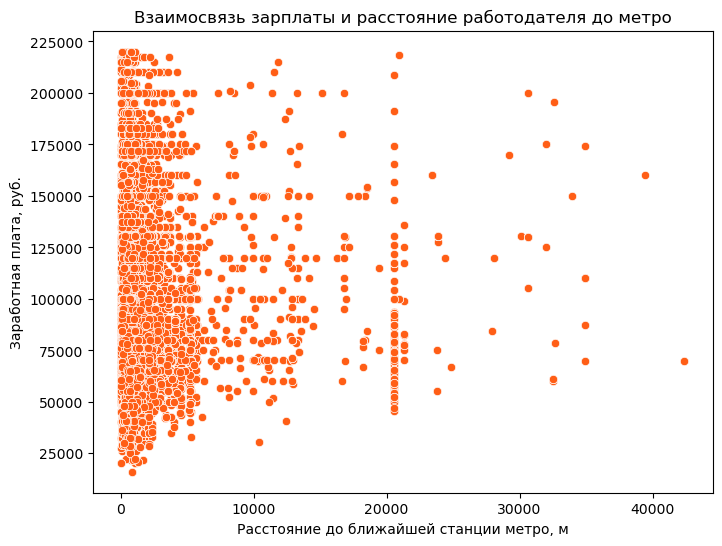

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance_to_the_nearest(m)', y='salary', data=vacancies_without_outliers, color='#FF5E16')
plt.title('Взаимосвязь зарплаты и расстояние работодателя до метро', fontsize=12)
plt.xlabel('Расстояние до ближайшей станции метро, м', fontsize=10)
plt.ylabel('Заработная плата, руб.', fontsize=10)
plt.show()

**Выводы:**
1. Расположение вакансии относительно метро не является определяющим фактором для уровня зарплаты (как уже было выявлено с помощью корреляционной матрицы Спирмена). Высоко- и низкооплачиваемые предложения встречаются как рядом с метро, так и на значительном удалении от него.
2. Большинство вакансий размещено в шаговой доступности от метро, что отражает структуру рынка труда в крупных городах, где транспортная доступность важна для работодателей и соискателей.

#### 6.6 Распределение заработной платы по административным округам Москвы

In [34]:
# Импортируем датасет, содержащий информацию об административном делении Москвы
moscow_geo = gpd.read_file(r'D:\pet_projects\vacancies_analysis\mo.geojson')
moscow_geo.head(3)

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"MULTIPOLYGON (((36.8031 55.44083, 36.80319 55...."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.80357 55.45162, 36.80451 55.46551..."


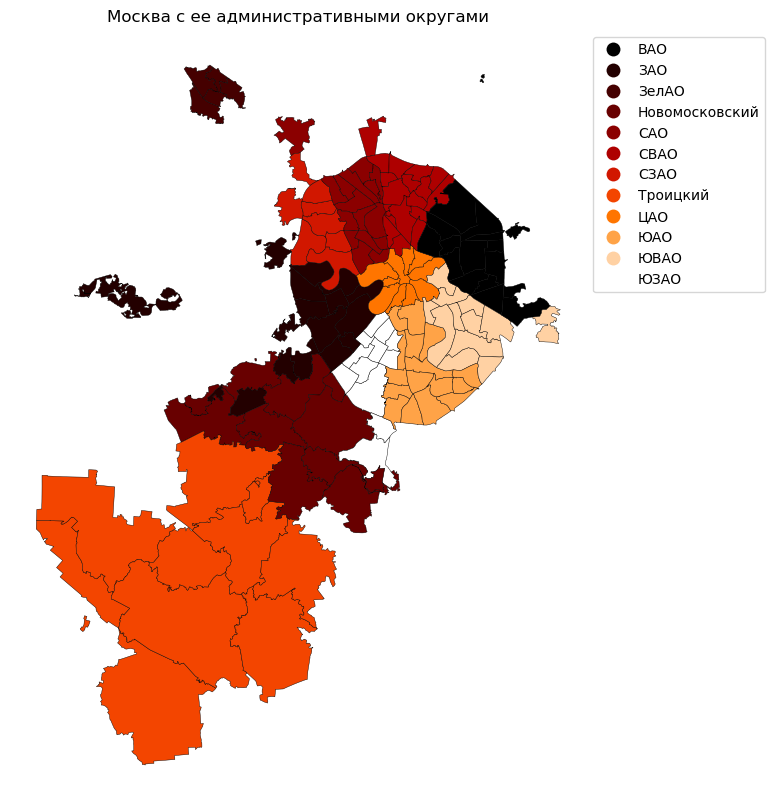

In [35]:
# to_crs — функция geopandas для преобразования системы координат (CRS, Coordinate Reference System).
# epsg='3857' — код стандартной картографической проекции Web Mercator, которая используется в большинстве онлайн-карт (Google Maps, OpenStreetMap и др.).
moscow_geo = moscow_geo.to_crs(epsg='3857')

#Отрисуем карту Москвы с ее административными округами.
moscow_geo.plot(column = 'ABBREV_AO',
                linewidth=0.3,
                edgecolor='black',
                legend=True,
                cmap='gist_heat',
                figsize=[10,10],
                legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

plt.title("Москва с ее административными округами", fontsize=12)
plt.axis('off')
plt.show()

In [36]:
# Сгруппируем данные по зарплате по АО и вычислим средний уровень зарплаты по каждому округу
ao_salary = vacancies_without_outliers.groupby('AO')['salary'].mean().reset_index()
ao_salary.columns = ['AO', 'mean_salary']
ao_salary = ao_salary.rename(columns={'AO': 'ABBREV_AO', 'mean_salary': 'avg_salary'})
ao_salary.head(3)

,ABBREV_AO,avg_salary
0,ВАО,93798.629920
1,ЗАО,100370.587070
2,ЗелАО,109074.133333


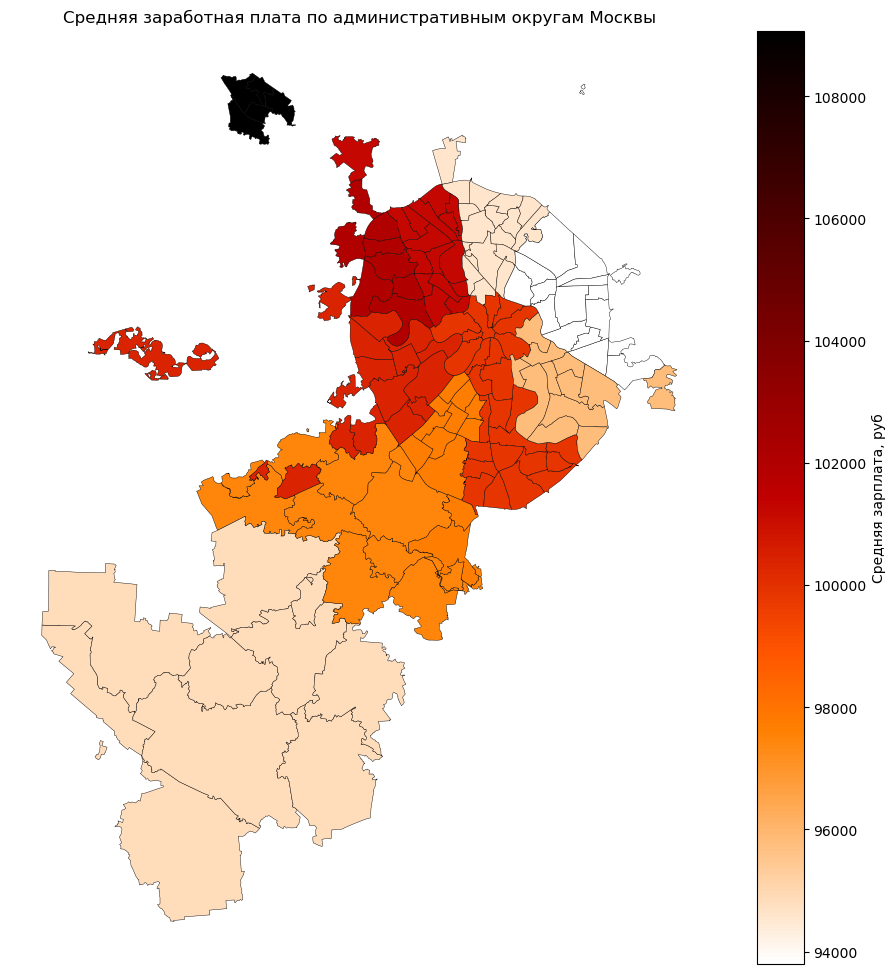

In [37]:
# Объединим в один датафрейм геоданные и среднюю зарплату
moscow_salary_map = moscow_geo.merge(ao_salary, on='ABBREV_AO')

# Переводим в метрическую проекцию для корректной отрисовки (EPSG:3857 — веб-карты)
moscow_salary_map = moscow_salary_map.to_crs(epsg=3857)

# Визуализация

moscow_salary_map.plot(
    column='avg_salary',
    cmap='gist_heat_r',
    linewidth=0.3,
    edgecolor='black',
    legend=True,
    figsize=[10,10],
    legend_kwds={'label': "Средняя зарплата, руб"},
)

plt.title('Средняя заработная плата по административным округам Москвы', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

**Выводы:**
1. Темный округ на северо-западе Москвы (Зеленоградский административный округ — ЗелАО) выделяется самой высокой средней зарплатой среди всех округов. Это может быть связано с его специализацией: Зеленоград считается научно-производственным центром микроэлектроники. Тут сосредоточены передовые исследовательские центры, которые занимаются разработкой и созданием новых технологий. Благодаря своим достижениям, ЗелАО получил прозвище русской Силиконовой долины.

2. Центральные и северо-западные округа (ЦАО, ЗАО, СЗАО, САО) имеют средние зарплаты выше, чем южные (Новомосковский, Троицкий). Возможные причины различий: в центральных и некоторых северных округах больше офисных, ИТ- и управленческих вакансий, что традиционно связано с более высокими зарплатами. В отдаленных от центра округах преобладают промышленные зоны, где могут быть представлены вакансии с более низкой оплатой — возможно, это рабочие профессии, логистика, строительство и т.д.

**Выводы по исследовательскому анализу данных**

На этапе исследовательского анализа данных (EDA) были выявлены ключевые переменные, потенциально влияющие на уровень предлагаемой заработной платы. Визуализация и описательные статистики позволили обнаружить различия в распределении зарплат между группами по таким признакам, как: отрасль, опыт работы, территориальная принадлежность вакансий, требование к наличию полного резюме.

Полученные выводы сформировали основу для выдвижения статистических гипотез, направленных на проверку статистической значимости различий распределений заработной платы. 

Поскольку переменная salary не подчиняется нормальному распределению, для проверки гипотез были использованы: тест Краскела-Уоллиса (для сравнения распределений между несколькими независимыми группами) и тест Манна-Уитни (для проверки различий между двумя независимыми группами).

![separator1](https://i.imgur.com/ZUWYTii.png)

## 7. Постановка гипотез <a name= '7'></a>

**Гипотезы, которые проверяются через тест Манна-Уитни:**
1. Н0: Средняя предлагаемая заработная плата не отличается, в зависимости от полного/неполного резюме\
   Н1: Средняя предлагаемая заработная плата различается в зависимости от политики к резюме

2. Н0: Предлагаемая средняя заработная плата не отличается в зависимости от локации\
   Н1: Предлагаемая средняя заработная плата в зависимости от локации не равна между собой
>Примечание: сгруппировать данные по локации (в Москве и не в Москве)


**Гипотезы, которые проверяются через тест Краскела-Уоллиса:**
1. Н0: Средняя заработная плата по отраслям не отличается\
   Н1: Средняя заработная плата по отраслям не равна между собой
2. Н0: Предлагаемая средняя заработная плата не отличается в зависимости от опыта работы\
   Н1: Предлагаемая средняя заработная плата в зависимости от опыта работы не равна между собой

![separator1](https://i.imgur.com/ZUWYTii.png)

## 8. Статистическая проверка гипотез <a name= '8'></a>

Критерий Краскела – Уоллиса (Kruskal-Wallis H-test) является непараметрическим аналогом однофакторного дисперсионного анализа (ANOVA) для сравнения трех и более независимых групп. Данный критерий используется, если распределение в группах не подчиняется закону нормального распределения (в нашем случае - salary).\
Основная цель критерия Краскела-Уоллиса — проверить гипотезу о том, что медианы всех групп равны, то есть не существует статистически значимых различий между распределениями зависимой переменной в разных группах.\
Нулевая гипотеза (H0) означает, что каждая группа имеет одинаковое распределение величины по группам, а альтернативная гипотеза (H1) предполагает разное распределение.\
Если полученное p-значение меньше выбранного уровня значимости (в нашем случае будем придерживаться 0,05), то нулевая гипотеза о равенстве медиан отвергается, и делается вывод о наличии значимых различий между группами. 

**Критерий Краскела – Уоллис рассчитывается следующим образом:**
1. Все значения, независимо от того, какой выборке они принадлежат, упорядочивают по возрастанию, как если бы это была одна объединенная выборка.
2. Каждому значению присваивается ранг от наименьшего к наибольшему – номер его места в упорядоченном ряду. Совпадающим значениям присваивают одинаковый ранг, равный среднему тех мест, которые эти величины делят между собой в общем упорядоченном ряду.
3. Вычисляют суммы рангов, относящихся к каждой группе (Ri).
4. Подсчитывают тестовую статистику критерия Краскела – Уоллиса (Н) по формуле:

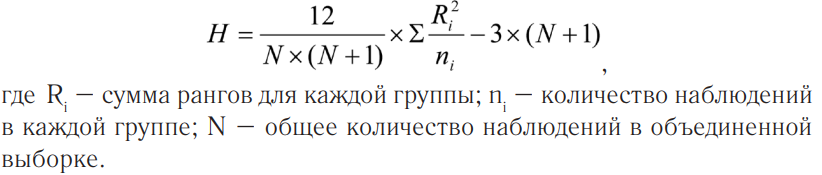

#### Гипотеза 1

Н0: Распределения заработной платы по отраслям не отличаются\
Н1: Хотя бы одно из распределений заработной платы по отраслям отличается\
Уровень значимости: 0.05 (5%)

In [38]:
groups_industry = vacancies_without_outliers.groupby('industry')['salary'].apply(list)

stat1, p1 = kruskal(*groups_industry)
print("Гипотеза 1: зарплата по отраслям")
print(f'H = {stat1:.3f}, p-value = {p1:.5f}')
if p1 < 0.05:
    print("  ❌ Отвергаем H0: есть статистически значимые различия в зарплате между отраслями.")
else:
    print("  ✅ Не отвергаем H0: различия в зарплате по отраслям статистически не значимы.")


Гипотеза 1: зарплата по отраслям
H = 564.094, p-value = 0.00000
  ❌ Отвергаем H0: есть статистически значимые различия в зарплате между отраслями.


**Выводы:**
- Полученное значение p-value значительно меньше выбранного уровня значимости (0.05).
- Есть основания отвергнуть гипотезу Н0.
- С доверительной вероятностью 0,95 можно утверждать, что отрасль действительно влияет на уровень заработной платы, и распределения зарплат по отраслям различаются.

![separator1](https://i.imgur.com/ZUWYTii.png)

#### Гипотеза 2

Н0: Распределения заработной платы в группах по опыту работы не отличаются\
Н1: Хотя бы одно распределение заработной платы по опыту работы отличается от других\
Уровень значимости: 0.05 (5%)

In [39]:
groups_experience = vacancies_without_outliers.groupby('experience')['salary'].apply(list)

stat2, p2 = kruskal(*groups_experience)
print("Гипотеза 2:")
print(f'H = {stat2:.3f}, p-value = {p2:.5f}')
if p2 < 0.05:
    print("  ❌ Отвергаем H0: зарплата зависит от уровня опыта.")
else:
    print("  ✅ Не отвергаем H0: статистически значимых различий в зарплате по опыту нет.")

Гипотеза 2:
H = 2477.665, p-value = 0.00000
  ❌ Отвергаем H0: зарплата зависит от уровня опыта.


**Выводы:**
- Полученное значение p-value значительно меньше выбранного уровня значимости (0.05).
- Есть основания отвергнуть гипотезу Н0.
- С доверительной вероятностью 0,95 можно утверждать, что в зависимости от опыта работы распределения зарплат различаются.

![separator1](https://i.imgur.com/ZUWYTii.png)

Критерий Манна–Уитни является непараметрическим аналогом t-критерия Стьюдента для двух независимых выборок. Он используется для проверки различий между двумя группами, когда зависимая переменная не подчиняется нормальному распределению (в нашем случае — salary).

Основная цель критерия Манна–Уитни — проверить гипотезу о том, что распределения количественной переменной в двух группах одинаковы, в частности, что одна группа не "сдвинута" по сравнению с другой.

Нулевая гипотеза (H₀) состоит в том, что распределения переменной в обеих группах одинаковы.
Альтернативная гипотеза (H₁) предполагает, что распределения различаются (например, одна группа имеет более высокие значения).

Если полученное p-значение меньше уровня значимости (в нашем случае — 0,05), то нулевая гипотеза отвергается, и делается вывод о наличии статистически значимых различий между группами.

**Критерий Манна-Уитни рассчитывается следующим образом:**
1. Значения из обеих выборок объединяются в одну совокупность и сортируются по возрастанию.
2. Каждому значению присваивается ранг в объединённом ряду.
3. Вычисляются суммы рангов для каждой из групп и определяется группа с наиболшей суммой рангов.
4. Подсчитывают тестовую статистику критерия Манна-Уитни (U) по формуле:

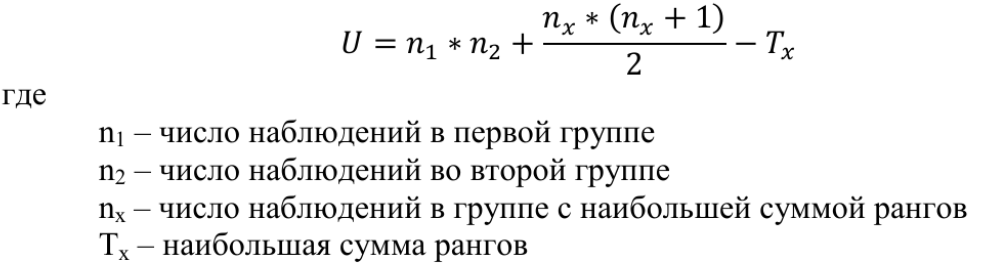

#### Гипотеза 3

Н0: Предлагаемая заработная плата не отличается в зависимости от локации\
Н1: Предлагаемая заработная плата в зависимости от локации не равна между собой\
Уровень значимости: 0.05 (5%)

In [40]:
# Группировка вакансий по местоположению: в Москве и не в Москве
in_moscow = vacancies_without_outliers[vacancies_without_outliers['AO'] != 'Не в Москве']['salary']
outside_moscow = vacancies_without_outliers[vacancies_without_outliers['AO'] == 'Не в Москве']['salary']

stat2, p2 = mannwhitneyu(in_moscow, outside_moscow, alternative='two-sided')
print("Гипотеза 3:")
print(f"  U = {stat2:.3f}, p-value = {p2:.5f}")
if p2 < 0.05:
    print("  ❌ Отвергаем H0: зарплата зависит от местоположения вакансии.")
else:
    print("  ✅ Не отвергаем H0: статистически значимых различий в зарплате по местоположению вакансии нет.")

Гипотеза 3:
  U = 34166890.500, p-value = 0.00000
  ❌ Отвергаем H0: зарплата зависит от местоположения вакансии.


**Выводы:**
- Полученное значение p-value значительно меньше выбранного уровня значимости (0.05).
- Есть основания отвергнуть гипотезу Н0.
- С доверительной вероятностью 0,95 можно утверждать, что уровень предлагаемых зарплат в Москве и за её пределами различается.

![separator1](https://i.imgur.com/ZUWYTii.png)

#### Гипотеза 4

Н0: Предлагаемая заработная плата не отличается, в зависимости от требования к полному резюме\
Н1: Предлагаемая заработная плата различается в зависимости от требования к полному резюме\
Уровень значимости: 0.05 (5%)

In [41]:
# Группировка вакансий по требованию к полному/неполному резюме
with_complete_resume = vacancies_without_outliers[vacancies_without_outliers['accept_incomplete_resumes'] == 1]['salary']
without_complete_resume = vacancies_without_outliers[vacancies_without_outliers['accept_incomplete_resumes'] == 0]['salary']

stat3, p3 = mannwhitneyu(with_complete_resume, without_complete_resume, alternative='two-sided')
print("Гипотеза 4:")
print(f"  U = {stat3:.3f}, p-value = {p3:.5f}")
if p2 < 0.05:
    print("  ❌ Отвергаем H0: зарплата зависит от требования к полному/неполному резюме.")
else:
    print("  ✅ Не отвергаем H0: статистически значимых различий в зарплате по требованию к полному/неполному резюме нет.")

Гипотеза 4:
  U = 48660468.500, p-value = 0.00000
  ❌ Отвергаем H0: зарплата зависит от требования к полному/неполному резюме.


**Выводы:**
- Полученное значение p-value значительно меньше выбранного уровня значимости (0.05).
- Есть основания отвергнуть гипотезу Н0.
- С доверительной вероятностью 0,95 можно утверждать, что в зависимости от требования к полному резюме уровень предлагаемых зарпалт различается.

![separator1](https://i.imgur.com/ZUWYTii.png)

## 9. Проверка модели на устойчивость <a name= '9'></a>

Алгоритм проверки устойчивости модели при проверке гипотезы — это набор дополнительных шагов или проверок, которые помогают убедиться, что полученные статистические выводы не являются случайными, нестабильными или зависящими от особенностей выборки.
Выполнним проверку устойчивости модели для четвертой гипотезы.

In [42]:
# Уникальные значения опыта работы
experience_order = [
    'Нет опыта', 
    'От 1 года до 3 лет', 
    'От 3 до 6 лет', 
    'Более 6 лет'
]

print("Проверка устойчивости гипотезы по подгруппам опыта:\n")

for level in experience_order:
    group = vacancies_without_outliers[vacancies_without_outliers['experience'] == level]
    
    # Разделение по требованию к полному резюме
    full_resume = group[group['accept_incomplete_resumes'] == 0]['salary']
    incomplete_resume = group[group['accept_incomplete_resumes'] == 1]['salary']
    
    n1 = len(full_resume)
    n2 = len(incomplete_resume)
    
    # Условие на минимальный размер выборок
    if n1 > 10 and n2 > 10:
        stat, p = mannwhitneyu(full_resume, incomplete_resume, alternative='two-sided')
        print(f"Опыт: {level:<25} | U = {stat:.2f} | p-value = {p:.5f} | n1 = {n1}, n2 = {n2}")
    else:
        print(f"Опыт: {level:<25} | Недостаточно данных (n1 = {n1}, n2 = {n2})")

Проверка устойчивости гипотезы по подгруппам опыта:

Опыт: Нет опыта                 | U = 10140476.00 | p-value = 0.00000 | n1 = 4258, n2 = 4321
Опыт: От 1 года до 3 лет        | U = 15149381.00 | p-value = 0.00000 | n1 = 7569, n2 = 3414
Опыт: От 3 до 6 лет             | U = 1364499.50 | p-value = 0.00000 | n1 = 2812, n2 = 768
Опыт: Более 6 лет               | U = 10639.00 | p-value = 0.00000 | n1 = 256, n2 = 53


**Выводы:**
- Во всех подгруппах по опыту p-value < 0.05, что свидетельствует о различном распредлении зарплат в зависимости от требования к наличию полного резюме
- Полученный результат говорит о высокой устойчивости механизма проверки гипотезы независимо от уровня опыта.

In [43]:
# Список уникальных отраслей 
industries = vacancies_without_outliers['industry'].unique()

print("Проверка устойчивости гипотезы по подгруппам отраслей:\n")

for industry in sorted(industries):
    group = vacancies_without_outliers[vacancies_without_outliers['industry'] == industry]
    
    full_resume = group[group['accept_incomplete_resumes'] == 0]['salary']
    incomplete_resume = group[group['accept_incomplete_resumes'] == 1]['salary']
    
    n1 = len(full_resume)
    n2 = len(incomplete_resume)
    
    # Проверка на достаточный размер выборок
    if n1 > 10 and n2 > 10:
        stat, p = mannwhitneyu(full_resume, incomplete_resume, alternative='two-sided')
        print(f"Отрасль: {industry:<35} | U = {stat:.2f} | p-value = {p:.5f} | n1 = {n1}, n2 = {n2}")
    else:
        print(f"Отрасль: {industry:<35} | Недостаточно данных (n1 = {n1}, n2 = {n2})")

Проверка устойчивости гипотезы по подгруппам отраслей:

Отрасль: Авто                                | U = 5979410.50 | p-value = 0.00000 | n1 = 4176, n2 = 2358
Отрасль: Логистика                           | U = 12545201.00 | p-value = 0.00000 | n1 = 5459, n2 = 4075
Отрасль: Электроника                         | U = 8057406.50 | p-value = 0.00000 | n1 = 5260, n2 = 2123


**Выводы:**
- Во всех подгруппах по отрасли p-value < 0.05, что свидетельствует о различном распредлении зарплат в зависимости от требования к наличию полного резюме.
- Полученный результат говорит о высокой устойчивости гипотезы независимо от отрасли.

**Общий вывод:**\
В рамках проверки устойчивости гипотезы о влиянии требования к полному резюме на уровень предлагаемой заработной платы было выявлено, что:
- во всех подгруппах по опыту работы наблюдаются статистически значимые различия в зарплате
- во всех проверенных отраслях (Авто, Логистика, Электроника) различия также присутствуют

Полученные результаты свидетельствует о высокой устойчивости модели. 

Мы подтвердили гипотезу о том, что вакансии, требующие наличие полного резюме, предлагают более высокую заработную плату, чем вакансии без этого требования.

![separator1](https://i.imgur.com/ZUWYTii.png)

## 10. Выводы <a name= '10'></a>

1. Вакансии с более высоким требуемым опытом систематически предлагают более высокие зарплаты. Наиболее высокие медианные зарплаты наблюдаются среди вакансий, предполагающих опыт «более 6 лет», что отражает рыночную логику: работодатели готовы компенсировать накопленные компетенции, управленческие навыки и ответственность более опытных специалистов. Различия заработной платы между группами по опыту работы статистически значимы (p < 0.05).
   
2. Предлагаемая заработная плата варьируется в зависимости от отрасли. Статистически значимые различия были подтвержены тестом Краскела–Уоллиса (p<0.05). Это различие объяснимо как через различную стоимость человеческого капитала, так и через различия в рентабельности бизнеса.

3. Уровень зарплаты зависит от местоположения вакансии. Статистически значимые различия, зафиксированные тестом Манна–Уитни (p < 0.05) вполне обоснованы. Это может быть связано с тем, что в некоторых районах Москвы могут быть сконцентрированы штаб-квартиры крупных компаний и офисы международных компаний, готовых предложить более высокую заработную плату. В отдаленных от центра округах преобладают промышленные зоны, где могут быть представлены вакансии с более низкой оплатой — возможно, это рабочие профессии, логистика, строительство и т.д.

4. Вакансии, допускающие неполные резюме, в среднем предлагают более низкие зарплаты, чем вакансии с требованием полного резюме. Тест Манна–Уитни подтвердил статистически значимые различия между этими группами (p<0.05).  Вероятное объяснение — вакансии без строгих требований к резюме чаще размещаются в отраслях массового найма или на начальных позициях, где формальный отбор играет меньшую роль. Таким образом, требование полного резюме может быть показателем более строгого и структурированного рекрутинга, ассоциированного с более высокими ожиданиями — и, соответственно, с более высокой оплатой.